Tutorial from: https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-2

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [2]:
# read in csv files
master_df = pd.read_csv('../baseballdatabank/core/People.csv', 
                        usecols=['playerID','nameFirst','nameLast',
                                 'bats','throws','debut','finalGame'])

master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame
0,aardsda01,David,Aardsma,R,R,2004-04-06,2015-08-23
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26
3,aasedo01,Don,Aase,R,R,1977-07-26,1990-10-03
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13


In [3]:
fielding_df = pd.read_csv('../baseballdatabank/core/Fielding.csv',
                          usecols=['playerID','yearID','stint','teamID',
                                   'lgID','POS','G','GS','InnOuts','PO',
                                   'A','E','DP'])
fielding_df.head()

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,A,E,DP
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1


In [4]:
batting_df = pd.read_csv('../baseballdatabank/core/Batting.csv')

batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
awards_df = pd.read_csv('../baseballdatabank/core/AwardsPlayers.csv',
                       usecols=['playerID', 'awardID', 'yearID'])

awards_df.head()

,playerID,awardID,yearID
0,bondto01,Pitching Triple Crown,1877
1,hinespa01,Triple Crown,1878
2,heckegu01,Pitching Triple Crown,1884
3,radboch01,Pitching Triple Crown,1884
4,oneilti01,Triple Crown,1887


In [6]:
allstar_df = pd.read_csv('../baseballdatabank/core/AllstarFull.csv',
                        usecols=['playerID', 'yearID'])

allstar_df.head()

,playerID,yearID
0,gomezle01,1933
1,ferreri01,1933
2,gehrilo01,1933
3,gehrich01,1933
4,dykesji01,1933


In [7]:
hof_df = pd.read_csv('../baseballdatabank/core/HallOfFame.csv', 
                    usecols=['playerID', 'yearID', 'votedBy', 'needed_note',
                            'inducted', 'category'])

hof_df.head()

,playerID,yearID,votedBy,inducted,category,needed_note
0,cobbty01,1936,BBWAA,Y,Player,NaN
1,ruthba01,1936,BBWAA,Y,Player,NaN
2,wagneho01,1936,BBWAA,Y,Player,NaN
3,mathech01,1936,BBWAA,Y,Player,NaN
4,johnswa01,1936,BBWAA,Y,Player,NaN


In [8]:
appearances_df = pd.read_csv('../baseballdatabank/core/Appearances.csv')

In [9]:
# check batting columns
batting_df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [10]:
# initialize dictionaries for player stats and years played
player_stats = {}
years_played = {}

# create dictionaries for player stats and years played from batting_df
for i, row in batting_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['G'] = player_stats[playerID]['G'] + row['G']
        player_stats[playerID]['AB'] = player_stats[playerID]['AB'] + row['AB']
        player_stats[playerID]['R'] = player_stats[playerID]['R'] + row['R']
        player_stats[playerID]['H'] = player_stats[playerID]['H'] + row['H']
        player_stats[playerID]['2B'] = player_stats[playerID]['2B'] + row['2B']
        player_stats[playerID]['3B'] = player_stats[playerID]['3B'] + row['3B']
        player_stats[playerID]['HR'] = player_stats[playerID]['HR'] + row['HR']
        player_stats[playerID]['RBI'] = player_stats[playerID]['RBI'] + row['RBI']
        player_stats[playerID]['SB'] = player_stats[playerID]['SB'] + row['SB']
        player_stats[playerID]['BB'] = player_stats[playerID]['BB'] + row['BB']
        player_stats[playerID]['SO'] = player_stats[playerID]['SO'] + row['SO']
        player_stats[playerID]['IBB'] = player_stats[playerID]['IBB'] + row['IBB']
        player_stats[playerID]['HBP'] = player_stats[playerID]['HBP'] + row['HBP']
        player_stats[playerID]['SH'] = player_stats[playerID]['SH'] + row['SH']
        player_stats[playerID]['SF'] = player_stats[playerID]['SF'] + row['SF']
        years_played[playerID].append(row['yearID'])
    
    else:
        player_stats[playerID] = {}
        player_stats[playerID]['G'] = row['G']
        player_stats[playerID]['AB'] = row['AB']
        player_stats[playerID]['R'] = row['R']
        player_stats[playerID]['H'] = row['H']
        player_stats[playerID]['2B'] = row['2B']
        player_stats[playerID]['3B'] = row['3B']
        player_stats[playerID]['HR'] = row['HR']
        player_stats[playerID]['RBI'] = row['RBI']
        player_stats[playerID]['SB'] = row['SB']
        player_stats[playerID]['BB'] = row['BB']
        player_stats[playerID]['SO'] = row['SO']
        player_stats[playerID]['IBB'] = row['IBB']
        player_stats[playerID]['HBP'] = row['HBP']
        player_stats[playerID]['SH'] = row['SH'] 
        player_stats[playerID]['SF'] = row['SF']
        years_played[playerID] = []
        years_played[playerID].append(row['yearID'])        
        
        
        

In [11]:
# iterate through years_played and add the number of years played to player_stats
for k, v in years_played.items():
    player_stats[k]['Years_Played'] = len(list(set(v)))

In [12]:
# initialize fielder_list
fielder_list = []

# add fielding stats to player_stats from fielding_df
for i, row in fielding_df.iterrows():
    playerID = row['playerID']
    Gf = row['G']
    GSf = row['GS']
    POf = row['PO']
    Af = row['A']
    Ef = row['E']
    DPf = row['DP']
    
    if playerID in player_stats and playerID in fielder_list:
        player_stats[playerID]['Gf'] = player_stats[playerID]['Gf'] + Gf
        player_stats[playerID]['GSf'] = player_stats[playerID]['GSf'] + GSf
        player_stats[playerID]['POf'] = player_stats[playerID]['POf'] + POf
        player_stats[playerID]['Af'] = player_stats[playerID]['Af'] + Af
        player_stats[playerID]['Ef'] = player_stats[playerID]['Ef'] + Ef
        player_stats[playerID]['DPf'] = player_stats[playerID]['DPf'] + DPf
    else:
        fielder_list.append(playerID)
        player_stats[playerID]['Gf'] = Gf
        player_stats[playerID]['GSf'] =  GSf
        player_stats[playerID]['POf'] =  POf
        player_stats[playerID]['Af'] = Af
        player_stats[playerID]['Ef'] = Ef
        player_stats[playerID]['DPf'] =  DPf
        

In [13]:
# check different kinds of awards
awards_df['awardID'].unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award',
       'Rolaids Relief Man Award', 'NLCS MVP', 'ALCS MVP',
       'Silver Slugger', 'Branch Rickey Award', 'Hank Aaron Award',
       'TSN Reliever of the Year', 'Comeback Player of the Year',
       'Outstanding DH Award', 'Reliever of the Year Award'], dtype=object)

In [14]:
# create dataframes for each award
mvp = awards_df[awards_df['awardID'] == 'Most Valuable Player']
roy = awards_df[awards_df['awardID'] == 'Rookie of the Year']
gg = awards_df[awards_df['awardID'] == 'Gold Glove']
ss = awards_df[awards_df['awardID'] == 'Silver Slugger']
ws_mvp = awards_df[awards_df['awardID'] == 'World Series MVP']

In [15]:
# include each dataframe in awards_list
awards_list = [mvp, roy, gg, ss, ws_mvp]

In [16]:
mvp_list = []
roy_list = []
gg_list = []
ss_list = []
ws_mvp_list = []

# Include each of the above lists in `lists`
lists = [mvp_list,roy_list,gg_list,ss_list,ws_mvp_list]

# add a count for each award for each player in player_stats
for index, v in enumerate(awards_list):
    for i, row in v.iterrows():
        playerID = row['playerID']
        award = row['awardID']
        if playerID in player_stats and playerID in lists[index]:
            player_stats[playerID][award] += 1
        else:
            lists[index].append(playerID)
            player_stats[playerID][award] = 1

In [17]:
# initialize allstar_list
allstar_list = []

# add a count for each Allstar game appearance for each player in player_stats
for i , row in allstar_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats and playerID in allstar_list:
        player_stats[playerID]['AS_games'] += 1
    else:
        allstar_list.append(playerID)
        player_stats[playerID]['AS_games'] = 1
        

In [18]:
# filter hof_df to include only those instances where a player was inducted into HOF
hof_df = hof_df[(hof_df['inducted'] == 'Y') & (hof_df['category'] == 'Player')]

hof_df.head()

,playerID,yearID,votedBy,inducted,category,needed_note
0,cobbty01,1936,BBWAA,Y,Player,NaN
1,ruthba01,1936,BBWAA,Y,Player,NaN
2,wagneho01,1936,BBWAA,Y,Player,NaN
3,mathech01,1936,BBWAA,Y,Player,NaN
4,johnswa01,1936,BBWAA,Y,Player,NaN


In [19]:
# indicate which players in player_stats were inducted into the HOF
for i, row in hof_df.iterrows():
    playerID = row['playerID']
    if playerID in player_stats:
        player_stats[playerID]['HoF'] = 1
        player_stats[playerID]['votedBy'] = row['votedBy']
        

In [20]:
# convert player_stats into a dataframe
stats_df = pd.DataFrame.from_dict(player_stats, orient='index')
stats_df.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger
aardsda01,331,4,0,0,0,0,0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,9,331.0,0.0,11.0,29.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2977.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN
aaronto01,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aasedo01,448,5,0,0,0,0,0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,13,448.0,91.0,67.0,135.0,13.0,10.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
abadan01,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# add column for playerID from the stats_df index
stats_df['playerID'] = stats_df.index

In [22]:
master_df = master_df.join(stats_df, on='playerID', how='inner', rsuffix='mstr')

In [23]:
master_df[master_df['AS_games'] > 18]

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2977.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01
10984,mantlmi01,Mickey,Mantle,B,R,1951-04-17,1968-09-28,2401,8102,1677,2415,344,72,536,1509.0,153.0,1733,1710.0,NaN,13.0,14.0,NaN,18,2290.0,NaN,6734.0,290.0,107.0,201.0,1.0,BBWAA,3.0,20.0,1.0,NaN,NaN,NaN,mantlmi01
11341,mayswi01,Willie,Mays,R,R,1951-05-25,1973-09-09,2992,10881,2062,3283,523,140,660,1903.0,338.0,1464,1526.0,NaN,44.0,13.0,NaN,22,2929.0,NaN,7752.0,233.0,156.0,121.0,1.0,BBWAA,2.0,24.0,12.0,1.0,NaN,NaN,mayswi01
12745,musiast01,Stan,Musial,L,L,1941-09-17,1963-09-29,3026,10972,1949,3630,725,177,475,1951.0,78.0,1599,696.0,NaN,53.0,35.0,NaN,22,2907.0,NaN,12439.0,818.0,142.0,962.0,1.0,BBWAA,3.0,24.0,NaN,NaN,NaN,NaN,musiast01
14998,ripkeca01,Cal,Ripken,R,R,1981-08-10,2001-10-06,3001,11551,1647,3184,603,44,431,1695.0,36.0,1129,1305.0,107.0,66.0,10.0,127.0,21,2977.0,2958.0,4112.0,8214.0,294.0,1682.0,1.0,BBWAA,2.0,19.0,2.0,1.0,NaN,8.0,ripkeca01
19218,willite01,Ted,Williams,L,R,1939-04-20,1960-09-28,2292,7706,1798,2654,525,71,521,1839.0,24.0,2021,709.0,NaN,39.0,5.0,NaN,19,2152.0,NaN,4158.0,142.0,113.0,30.0,1.0,BBWAA,2.0,19.0,NaN,NaN,NaN,NaN,willite01


In [24]:
appearances_df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,0,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,0,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,1,2,20,0,1,0,0,1,0.0,0.0,0.0


In [25]:
# Initialize a dictionary
pos_dict = {}

# Iterate through `appearances_df`
# Add a count for the number of appearances for each player at each position
# Also add a count for the number of games played for each player in each era.
for i, row in appearances_df.iterrows():
    ID = row['playerID']
    year = row['yearID']
    if ID in pos_dict:
        pos_dict[ID]['G_all'] = pos_dict[ID]['G_all'] + row['G_all']
        pos_dict[ID]['G_p'] = pos_dict[ID]['G_p'] + row['G_p']
        pos_dict[ID]['G_c'] = pos_dict[ID]['G_c'] + row['G_c']
        pos_dict[ID]['G_1b'] = pos_dict[ID]['G_1b'] + row['G_1b']
        pos_dict[ID]['G_2b'] = pos_dict[ID]['G_2b'] + row['G_2b']
        pos_dict[ID]['G_3b'] = pos_dict[ID]['G_3b'] + row['G_3b']
        pos_dict[ID]['G_ss'] = pos_dict[ID]['G_ss'] + row['G_ss']
        pos_dict[ID]['G_lf'] = pos_dict[ID]['G_lf'] + row['G_lf']
        pos_dict[ID]['G_cf'] = pos_dict[ID]['G_cf'] + row['G_cf']
        pos_dict[ID]['G_rf'] = pos_dict[ID]['G_rf'] + row['G_rf']
        pos_dict[ID]['G_of'] = pos_dict[ID]['G_of'] + row['G_of']
        pos_dict[ID]['G_dh'] = pos_dict[ID]['G_dh'] + row['G_dh']
        if year < 1920:
            pos_dict[ID]['pre1920'] = pos_dict[ID]['pre1920'] + row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = pos_dict[ID]['1920-41'] + row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = pos_dict[ID]['1942-45'] + row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = pos_dict[ID]['1946-62'] + row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = pos_dict[ID]['1963-76'] + row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = pos_dict[ID]['1977-92'] + row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = pos_dict[ID]['1993-2009'] + row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = pos_dict[ID]['post2009'] + row['G_all']
    else:
        pos_dict[ID] = {}
        pos_dict[ID]['G_all'] = row['G_all']
        pos_dict[ID]['G_p'] = row['G_p']
        pos_dict[ID]['G_c'] = row['G_c']
        pos_dict[ID]['G_1b'] = row['G_1b']
        pos_dict[ID]['G_2b'] = row['G_2b']
        pos_dict[ID]['G_3b'] = row['G_3b']
        pos_dict[ID]['G_ss'] = row['G_ss']
        pos_dict[ID]['G_lf'] = row['G_lf']
        pos_dict[ID]['G_cf'] = row['G_cf']
        pos_dict[ID]['G_rf'] = row['G_rf']
        pos_dict[ID]['G_of'] = row['G_of']
        pos_dict[ID]['G_dh'] = row['G_dh']
        pos_dict[ID]['pre1920'] = 0
        pos_dict[ID]['1920-41'] = 0
        pos_dict[ID]['1942-45'] = 0
        pos_dict[ID]['1946-62'] = 0
        pos_dict[ID]['1963-76'] = 0
        pos_dict[ID]['1977-92'] = 0
        pos_dict[ID]['1993-2009'] = 0
        pos_dict[ID]['post2009'] = 0
        if year < 1920:
            pos_dict[ID]['pre1920'] = row['G_all']
        elif year >= 1920 and year <= 1941:
            pos_dict[ID]['1920-41'] = row['G_all']
        elif year >= 1942 and year <= 1945:
            pos_dict[ID]['1942-45'] = row['G_all']
        elif year >= 1946 and year <= 1962:
            pos_dict[ID]['1946-62'] = row['G_all']
        elif year >= 1963 and year <= 1976:
            pos_dict[ID]['1963-76'] = row['G_all']
        elif year >= 1977 and year <= 1992:
            pos_dict[ID]['1977-92'] = row['G_all']
        elif year >= 1993 and year <= 2009:
            pos_dict[ID]['1993-2009'] = row['G_all']
        elif year > 2009:
            pos_dict[ID]['post2009'] = row['G_all']

In [26]:
# convert pos_dict to a dataframe
pos_df = pd.DataFrame.from_dict(pos_dict, orient='index')

In [27]:
pos_df.head()

,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009
aardsda01,331,331,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,201,130
aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0
aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0
aasedo01,448,448,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,448,0,0
abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0


In [28]:
pos_df.columns

Index(['G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf', 'G_cf',
       'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45', '1946-62',
       '1963-76', '1977-92', '1993-2009', 'post2009'],
      dtype='object')

In [29]:
# create list from columns of pos_df
pos_col_list = pos_df.columns.tolist()

In [30]:
# remove G_all 
pos_col_list.remove('G_all')

In [31]:
pos_col_list

['G_p',
 'G_c',
 'G_1b',
 'G_2b',
 'G_3b',
 'G_ss',
 'G_lf',
 'G_cf',
 'G_rf',
 'G_of',
 'G_dh',
 'pre1920',
 '1920-41',
 '1942-45',
 '1946-62',
 '1963-76',
 '1977-92',
 '1993-2009',
 'post2009']

In [32]:
# loop through the list and divide each column by the players total games played
for col in pos_col_list:
    column = col +'_percent'
    pos_df[column] = pos_df[col] /pos_df['G_all']
    
pos_df.head()

,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
aardsda01,331,331,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,201,130,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.607251,0.392749
aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.0,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.000000,0.000000
aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.0,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.000000,0.000000
aasedo01,448,448,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,448,0,0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0.000000,0.000000
abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.0,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.000000,0.000000


In [33]:
# filter pos_df to eliminate players who played 10% or more of their games as pitchers or catchers
pos_df = pos_df[(pos_df['G_p_percent'] < 0.1) & (pos_df['G_c_percent'] < 0.1)]

In [34]:
pos_df.head()

,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0
abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0
abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
abbated01,857,0,0,0,419,20,388,0,2,1,3,NaN,857,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [35]:
# join pos_df and master_df
master_df = master_df.join(pos_df, on='playerID', how='right')

In [36]:
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2977.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,283.0,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,857,0,0,0,419,20,388,0,2,1,3,NaN,857,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [37]:
# replace NA values with None
master_df['votedBy'] = master_df['votedBy'].fillna('None')

In [38]:
master_df['votedBy'].value_counts()

None                8214
BBWAA                 71
Veterans              50
Old Timers            11
Run Off                2
Negro League           2
Special Election       2
Name: votedBy, dtype: int64

In [39]:
master_df = master_df[(master_df['votedBy'] == 'None') | 
          (master_df['votedBy'] == 'BBWAA') | 
          (master_df['votedBy'] == 'Run Off')]

In [40]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 1 to 19787
Data columns (total 77 columns):
playerID                8287 non-null object
nameFirst               8258 non-null object
nameLast                8287 non-null object
bats                    7779 non-null object
throws                  7771 non-null object
debut                   8284 non-null object
finalGame               8284 non-null object
G                       8287 non-null int64
AB                      8287 non-null int64
R                       8287 non-null int64
H                       8287 non-null int64
2B                      8287 non-null int64
3B                      8287 non-null int64
HR                      8287 non-null int64
RBI                     8012 non-null float64
SB                      7826 non-null float64
BB                      8287 non-null int64
SO                      7674 non-null float64
IBB                     4233 non-null float64
HBP                     7721 non-null flo

In [41]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [42]:
# convert bats and throws columns
master_df['throws_R'] = master_df['throws'].apply(bats_throws)
master_df['bats_R'] = master_df['bats'].apply(bats_throws)
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2977.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1,1
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1,1
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0,0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,283.0,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,857,0,0,0,419,20,388,0,2,1,3,NaN,857,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1


In [43]:
from datetime import datetime

In [44]:
# convert debut and finalGame to datetime
master_df['debut'] = pd.to_datetime(master_df['debut'])
master_df['finalGame'] = pd.to_datetime(master_df['finalGame'])

In [45]:
# create new columns for debutYear and finalYear
master_df['debutYear'] = pd.to_numeric(master_df['debut'].dt.strftime('%Y'), errors='coerce')
master_df['finalYear'] = pd.to_numeric(master_df['finalGame'].dt.strftime('%Y'), errors='coerce')
master_df.head()

,playerID,nameFirst,nameLast,bats,throws,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,IBB,HBP,SH,SF,Years_Played,Gf,GSf,POf,Af,Ef,DPf,HoF,votedBy,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,playerIDmstr,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R,debutYear,finalYear
1,aaronha01,Hank,Aaron,R,R,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,NaN,32.0,21.0,121.0,23,3020.0,2977.0,7436.0,429.0,144.0,218.0,1.0,BBWAA,1.0,25.0,3.0,NaN,NaN,NaN,aaronha01,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1,1,1954.0,1976.0
2,aaronto01,Tommie,Aaron,R,R,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,3.0,0.0,9.0,6.0,7,387.0,206.0,1317.0,113.0,22.0,124.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,aaronto01,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1,1,1962.0,1971.0
4,abadan01,Andy,Abad,L,L,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,0.0,3,9.0,4.0,37.0,1.0,1.0,3.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,abadan01,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0,0,2001.0,2006.0
6,abadijo01,John,Abadie,R,R,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,NaN,1,12.0,NaN,129.0,3.0,13.0,1.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,abadijo01,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1875.0,1875.0
7,abbated01,Ed,Abbaticchio,R,R,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,283.0,NaN,33.0,93.0,NaN,9,830.0,NaN,1873.0,2368.0,315.0,247.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,abbated01,857,0,0,0,419,20,388,0,2,1,3,NaN,857,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1897.0,1910.0


In [46]:
# create new dataframe after dropping unnecessary columns
df = master_df.drop(['votedBy', 'IBB', 'bats', 'throws', 
                'GSf', 'POf', 'Gf', 'playerIDmstr'], axis=1)
df.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R,debutYear,finalYear
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,NaN,NaN,NaN,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1,1,1954.0,1976.0
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1,1,1962.0,1971.0
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0,0,2001.0,2006.0
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,NaN,NaN,NaN,1,3.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1875.0,1875.0
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,283.0,33.0,93.0,NaN,9,2368.0,315.0,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,857,0,0,0,419,20,388,0,2,1,3,NaN,857,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,NaN,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1897.0,1910.0


In [47]:
# check new df for null values
df.isnull().sum()

playerID                   0
nameFirst                 29
nameLast                   0
debut                      3
finalGame                  3
G                          0
AB                         0
R                          0
H                          0
2B                         0
3B                         0
HR                         0
RBI                      275
SB                       461
BB                         0
SO                       613
HBP                      566
SH                       860
SF                      4002
Years_Played               0
Af                       199
Ef                       199
DPf                      199
HoF                     8214
Most Valuable Player    8180
AS_games                7409
Gold Glove              8019
Rookie of the Year      8193
World Series MVP        8260
Silver Slugger          8034
                        ... 
1920-41                    0
1942-45                    0
1946-62                    0
1963-76       

In [48]:
df.isnull().sum().sort_values()

playerID                   0
G_cf                       0
G_rf                       0
G_of                       0
pre1920                    0
1920-41                    0
1942-45                    0
1946-62                    0
1963-76                    0
1977-92                    0
1993-2009                  0
post2009                   0
G_p_percent                0
G_c_percent                0
G_1b_percent               0
G_2b_percent               0
G_3b_percent               0
G_ss_percent               0
bats_R                     0
throws_R                   0
post2009_percent           0
1993-2009_percent          0
1977-92_percent            0
1963-76_percent            0
G_lf                       0
1946-62_percent            0
1920-41_percent            0
pre1920_percent            0
G_of_percent               0
G_rf_percent               0
                        ... 
AB                         0
G_all                      0
G_p                        0
G_c           

In [49]:
# fill null values in numeric columns with 0
fill_cols = ['AS_games', 'Silver Slugger', 'Rookie of the Year', 
             'Gold Glove', 'Most Valuable Player', 'HoF', '1977-92', 
             'pre1920', '1942-45', '1946-62', '1963-76', '1920-41', 
             '1993-2009', 'HBP', 'SB', 'SF', 'SH', 'RBI', 'SO', 
             'World Series MVP', 'G_dh_percent', 'G_dh', 'Af', 'DPf', 'Ef']

for col in fill_cols:
    df[col] = df[col].fillna(0)

In [50]:
df.isnull().sum().sort_values()


playerID                 0
G_1b_percent             0
G_c_percent              0
G_p_percent              0
post2009                 0
1993-2009                0
1977-92                  0
G_2b_percent             0
1963-76                  0
1942-45                  0
1920-41                  0
pre1920                  0
G_dh                     0
G_of                     0
G_rf                     0
1946-62                  0
G_cf                     0
G_3b_percent             0
G_lf_percent             0
bats_R                   0
throws_R                 0
post2009_percent         0
1993-2009_percent        0
1977-92_percent          0
1963-76_percent          0
G_ss_percent             0
1946-62_percent          0
1920-41_percent          0
pre1920_percent          0
G_dh_percent             0
                        ..
RBI                      0
SB                       0
BB                       0
SO                       0
HBP                      0
G_3b                     0
S

In [51]:
df[df['nameFirst'].isnull()]

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R,debutYear,finalYear
1600,bolan01,NaN,Boland,1875-09-04,1875-09-04,1,4,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1875.0,1875.0
1669,booth01,NaN,Booth,1875-05-01,1875-05-01,1,2,0,0,0,0,0,0.0,0.0,0,1.0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1875.0,1875.0
2760,carroch01,NaN,Carroll,1884-04-17,1884-04-21,4,16,1,4,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0,0,0,0,0,0,4,0,0,4,0.0,4,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1884.0,1884.0
5285,evans01,NaN,Evans,1875-06-01,1875-06-01,1,4,1,2,0,0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1875.0,1875.0
5859,frank01,NaN,Franklin,1884-09-27,1884-09-27,1,3,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,1,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1884.0,1884.0
6275,gaver01,NaN,Gavern,1874-06-15,1874-06-15,1,4,1,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,8.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1874.0,1874.0
7408,harribe01,NaN,Harrison,1901-09-27,1901-09-27,1,2,0,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,1,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1901.0,1901.0
7685,helli01,NaN,Hellings,1875-07-19,1875-07-19,1,4,0,1,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1875.0,1875.0
7940,higby01,NaN,Higby,1872-09-18,1872-09-18,1,4,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,1,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1872.0,1872.0
7959,hilde01,NaN,Hillebrand,1902-08-29,1902-08-29,1,4,1,0,0,0,0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,1,1,0.0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1902.0,1902.0


In [52]:
# drop any additional rows with null values
df = df.dropna()

In [53]:
# check one more time for nulls
df.isnull().sum()

playerID                0
nameFirst               0
nameLast                0
debut                   0
finalGame               0
G                       0
AB                      0
R                       0
H                       0
2B                      0
3B                      0
HR                      0
RBI                     0
SB                      0
BB                      0
SO                      0
HBP                     0
SH                      0
SF                      0
Years_Played            0
Af                      0
Ef                      0
DPf                     0
HoF                     0
Most Valuable Player    0
AS_games                0
Gold Glove              0
Rookie of the Year      0
World Series MVP        0
Silver Slugger          0
                       ..
1920-41                 0
1942-45                 0
1946-62                 0
1963-76                 0
1977-92                 0
1993-2009               0
post2009                0
G_p_percent 

In [54]:
# create batting average column
df['AVE'] = df['H'] / df['AB']

In [55]:
# create on base percentage column
plate_appearances = df['AB'] + df['BB'] + df['SF'] + df['SH'] + df['HBP']
df['OBP'] = (df['H'] + df['BB'] + df['HBP']) / plate_appearances

In [56]:
# create slugging percent column
single = ((df['H'] - df['2B']) - df['3B']) - df['HR']
df['Slug_Percent'] = ((df['HR'] * 4 ) + (df['3B'] * 3) 
                      + (df['2B'] * 2) + single) / df['AB']

In [57]:
# create on base plus slugging percent column
hr = df['HR'] * 4
triple = df['3B'] * 3
double = df['2B'] * 2
df['OPS'] = df['OBP'] + df['Slug_Percent']

In [58]:
df.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R,debutYear,finalYear,AVE,OBP,Slug_Percent,OPS
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.0,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1,1,1954.0,1976.0,0.304998,0.373386,0.554513,0.927899
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.0,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1,1,1962.0,1971.0,0.228814,0.288995,0.327331,0.616326
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0,0,2001.0,2006.0,0.095238,0.240000,0.095238,0.335238
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1875.0,1875.0,0.224490,0.224490,0.224490,0.448980
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,283.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,857,0,0,0,419,20,388,0,2,1,3,0.0,857,0,0,0,0,0,0,0,0.0,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1897.0,1910.0,0.253614,0.316276,0.325230,0.641506


In [59]:
# df.to_csv('masterHOF.csv')

In [60]:
df_hof = df[df['HoF'] == 1]

In [61]:
len(df_hof)

73

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

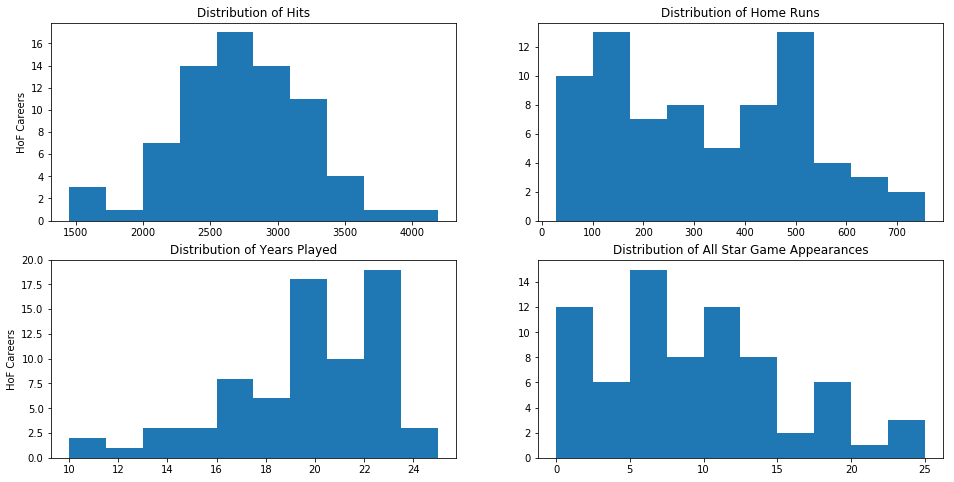

In [63]:
# initialize the figure and add subplots
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# create distribuation plots for hits, HR, years played and all star games
ax1.hist(df_hof['H'])
ax1.set_title('Distribution of Hits')
ax1.set_ylabel('HoF Careers')
ax2.hist(df_hof['HR'])
ax2.set_title('Distribution of Home Runs')
ax3.hist(df_hof['Years_Played'])
ax3.set_title('Distribution of Years Played')
ax3.set_ylabel('HoF Careers')
ax4.hist(df_hof['AS_games'])
ax4.set_title('Distribution of All Star Game Appearances')

plt.show()

In [64]:
# filter df to include only players with 10 or more seasons played
df_10 = df[(df['Years_Played'] >= 10) & (df['HoF'] == 0)]

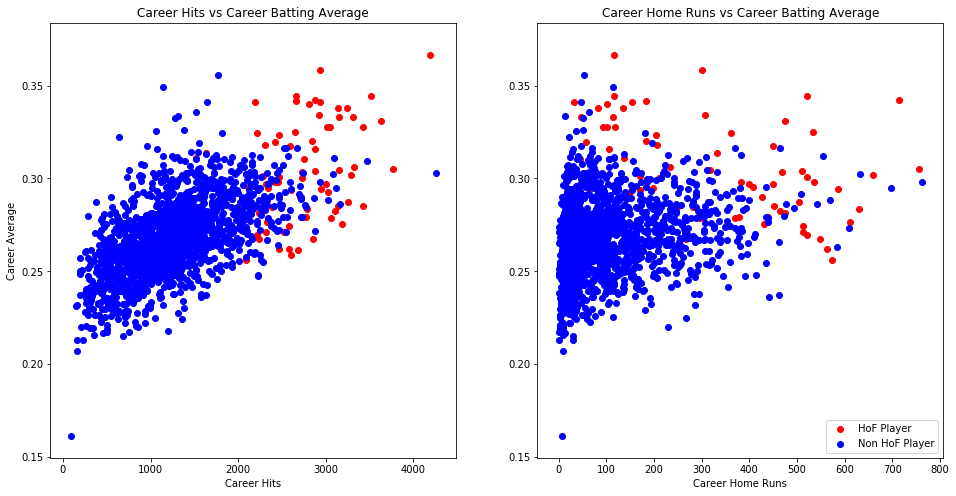

In [65]:
# plot scatter plot 
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df_hof['H'], df_hof['AVE'], c='r', label='HoF Player')
ax1.scatter(df_10['H'], df_10['AVE'], c='b', label='Non HoF Player')
ax1.set_title('Career Hits vs Career Batting Average')
ax1.set_xlabel('Career Hits')
ax1.set_ylabel('Career Average')
ax2.scatter(df_hof['HR'], df_hof['AVE'], c='r', label='HoF Player')
ax2.scatter(df_10['HR'], df_10['AVE'], c='b', label='Non HoF Player')
ax2.set_title('Career Home Runs vs Career Batting Average')
ax2.set_xlabel('Career Home Runs')
ax2.legend(loc='lower right', scatterpoints=1)

plt.show()

In [66]:
df.isnull().sum()

playerID                 0
nameFirst                0
nameLast                 0
debut                    0
finalGame                0
G                        0
AB                       0
R                        0
H                        0
2B                       0
3B                       0
HR                       0
RBI                      0
SB                       0
BB                       0
SO                       0
HBP                      0
SH                       0
SF                       0
Years_Played             0
Af                       0
Ef                       0
DPf                      0
HoF                      0
Most Valuable Player     0
AS_games                 0
Gold Glove               0
Rookie of the Year       0
World Series MVP         0
Silver Slugger           0
                        ..
1977-92                  0
1993-2009                0
post2009                 0
G_p_percent              0
G_c_percent              0
G_1b_percent             0
G

In [67]:
# drop null values from new columns
df = df.dropna()

In [68]:
# create column for years since retirement
df['YSLS'] = 2019 - df['finalYear']

In [69]:
# filter df for players who retired more than 15 years ago 
df_hitters = df[df['YSLS'] > 15]
df_hitters.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R,debutYear,finalYear,AVE,OBP,Slug_Percent,OPS,YSLS
1,aaronha01,Hank,Aaron,1954-04-13,1976-10-03,3298,12364,2174,3771,624,98,755,2297.0,240.0,1402,1383.0,32.0,21.0,121.0,23,429.0,144.0,218.0,1.0,1.0,25.0,3.0,0.0,0.0,0.0,3298,0,0,210,43,7,0,315,308,2174,2760,201.0,0,0,0,1350,1948,0,0,0,0.000000,0.0,0.063675,0.013038,0.002122,0.000000,0.095512,0.093390,0.659187,0.836871,0.060946,0.0,0.0,0.0,0.409339,0.590661,0.0,0.0,0.0,1,1,1954.0,1976.0,0.304998,0.373386,0.554513,0.927899,43.0
2,aaronto01,Tommie,Aaron,1962-04-10,1971-09-26,437,944,102,216,42,6,13,94.0,9.0,86,145.0,0.0,9.0,6.0,7,113.0,22.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437,0,0,232,7,10,0,135,1,2,137,0.0,0,0,0,141,296,0,0,0,0.000000,0.0,0.530892,0.016018,0.022883,0.000000,0.308924,0.002288,0.004577,0.313501,0.000000,0.0,0.0,0.0,0.322654,0.677346,0.0,0.0,0.0,1,1,1962.0,1971.0,0.228814,0.288995,0.327331,0.616326,48.0
6,abadijo01,John,Abadie,1875-04-26,1875-06-10,12,49,4,11,0,0,0,5.0,1.0,0,3.0,0.0,0.0,0.0,1,3.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0,0,12,0,0,0,0,0,0,0,0.0,12,0,0,0,0,0,0,0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1875.0,1875.0,0.224490,0.224490,0.224490,0.448980,144.0
7,abbated01,Ed,Abbaticchio,1897-09-04,1910-09-15,855,3044,355,772,99,43,11,324.0,142.0,289,283.0,33.0,93.0,0.0,9,2368.0,315.0,247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,857,0,0,0,419,20,388,0,2,1,3,0.0,857,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.488915,0.023337,0.452742,0.000000,0.002334,0.001167,0.003501,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1,1,1897.0,1910.0,0.253614,0.316276,0.325230,0.641506,109.0
9,abbeych01,Charlie,Abbey,1893-08-16,1897-08-19,452,1756,307,493,67,46,19,280.0,93.0,167,122.0,23.0,0.0,0.0,5,92.0,100.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452,1,0,0,0,0,0,92,185,173,451,0.0,452,0,0,0,0,0,0,0,0.002212,0.0,0.000000,0.000000,0.000000,0.000000,0.203540,0.409292,0.382743,0.997788,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0,1893.0,1897.0,0.280752,0.350976,0.403759,0.754735,122.0


In [70]:
# filter df for players who retired less than 15 years ago and currently active players
df_eligible = df[df['YSLS'] <= 15]
df_eligible.head()

,playerID,nameFirst,nameLast,debut,finalGame,G,AB,R,H,2B,3B,HR,RBI,SB,BB,SO,HBP,SH,SF,Years_Played,Af,Ef,DPf,HoF,Most Valuable Player,AS_games,Gold Glove,Rookie of the Year,World Series MVP,Silver Slugger,G_all,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,pre1920,1920-41,1942-45,1946-62,1963-76,1977-92,1993-2009,post2009,G_p_percent,G_c_percent,G_1b_percent,G_2b_percent,G_3b_percent,G_ss_percent,G_lf_percent,G_cf_percent,G_rf_percent,G_of_percent,G_dh_percent,pre1920_percent,1920-41_percent,1942-45_percent,1946-62_percent,1963-76_percent,1977-92_percent,1993-2009_percent,post2009_percent,throws_R,bats_R,debutYear,finalYear,AVE,OBP,Slug_Percent,OPS,YSLS
4,abadan01,Andy,Abad,2001-09-10,2006-04-13,15,21,1,2,0,0,0,0.0,0.0,4,5.0,0.0,0.0,0.0,3,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15,0,0,8,0,0,0,0,0,1,1,0.0,0,0,0,0,0,0,15,0,0.0,0.0,0.533333,0.000000,0.0,0.0,0.000000,0.000000,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0,0,2001.0,2006.0,0.095238,0.240000,0.095238,0.335238,13.0
21,abercre01,Reggie,Abercrombie,2006-04-04,2008-09-28,180,386,65,86,20,2,9,34.0,18.0,21,123.0,7.0,5.0,2.0,3,7.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180,0,0,0,0,0,0,18,115,15,134,0.0,0,0,0,0,0,0,180,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.100000,0.638889,0.083333,0.744444,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1,1,2006.0,2008.0,0.222798,0.270784,0.354922,0.625706,11.0
23,abernbr01,Brent,Abernathy,2001-06-25,2005-09-29,232,868,97,212,36,5,8,79.0,21.0,60,93.0,7.0,16.0,4.0,4,590.0,22.0,154.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232,0,0,0,223,0,0,5,0,0,5,3.0,0,0,0,0,0,0,232,0,0.0,0.0,0.000000,0.961207,0.0,0.0,0.021552,0.000000,0.000000,0.021552,0.012931,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1,1,2001.0,2005.0,0.244240,0.292147,0.324885,0.617031,14.0
33,abreubo01,Bobby,Abreu,1996-09-01,2014-09-28,2425,8480,1453,2470,574,59,288,1363.0,400.0,1476,1840.0,33.0,7.0,85.0,18,136.0,73.0,24.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,2425,0,0,0,0,0,0,142,21,1990,2138,161.0,0,0,0,0,0,0,1951,474,0.0,0.0,0.000000,0.000000,0.0,0.0,0.058557,0.008660,0.820619,0.881649,0.066392,0.0,0.0,0.0,0.0,0.0,0.0,0.804536,0.195464,1,0,1996.0,2014.0,0.291274,0.394703,0.474764,0.869467,5.0
35,abreujo02,Jose,Abreu,2014-03-31,2019-07-24,742,2913,398,858,180,13,146,488.0,8.0,209,624.0,67.0,0.0,24.0,5,364.0,43.0,547.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,742,0,0,629,0,0,0,0,0,0,0,112.0,0,0,0,0,0,0,0,742,0.0,0.0,0.847709,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.150943,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1,1,2014.0,2019.0,0.294542,0.352941,0.515620,0.868561,0.0


In [71]:
df.columns

Index(['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame', 'G', 'AB',
       'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'HBP', 'SH', 'SF',
       'Years_Played', 'Af', 'Ef', 'DPf', 'HoF', 'Most Valuable Player',
       'AS_games', 'Gold Glove', 'Rookie of the Year', 'World Series MVP',
       'Silver Slugger', 'G_all', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss',
       'G_lf', 'G_cf', 'G_rf', 'G_of', 'G_dh', 'pre1920', '1920-41', '1942-45',
       '1946-62', '1963-76', '1977-92', '1993-2009', 'post2009', 'G_p_percent',
       'G_c_percent', 'G_1b_percent', 'G_2b_percent', 'G_3b_percent',
       'G_ss_percent', 'G_lf_percent', 'G_cf_percent', 'G_rf_percent',
       'G_of_percent', 'G_dh_percent', 'pre1920_percent', '1920-41_percent',
       '1942-45_percent', '1946-62_percent', '1963-76_percent',
       '1977-92_percent', '1993-2009_percent', 'post2009_percent', 'throws_R',
       'bats_R', 'debutYear', 'finalYear', 'AVE', 'OBP', 'Slug_Percent', 'OPS',
       'YSLS'],

In [72]:
df.corr()['HoF'].sort_values()

pre1920_percent        -0.037848
post2009_percent       -0.035045
YSLS                   -0.024260
post2009               -0.019176
1993-2009_percent      -0.007062
1942-45_percent        -0.006227
debutYear              -0.005813
G_2b_percent           -0.002744
G_3b_percent           -0.001906
bats_R                 -0.000453
G_c_percent             0.000048
G_ss_percent            0.002538
throws_R                0.004763
G_lf_percent            0.006424
G_cf_percent            0.006908
G_p_percent             0.007041
G_rf_percent            0.009660
G_of_percent            0.013974
1946-62_percent         0.019403
G_1b_percent            0.021392
finalYear               0.024260
1920-41_percent         0.027700
1977-92_percent         0.027879
1963-76_percent         0.030257
G_dh_percent            0.031792
G_c                     0.034916
pre1920                 0.057647
1942-45                 0.067159
G_p                     0.068393
1993-2009               0.078497
          

In [73]:
# Select columns to use for models, and identification columns
num_cols_hitters = ['playerID', 'nameFirst', 'nameLast', 'HoF', 
                    'Years_Played', 'H', 'BB', 'HR', 'AVE', 'OBP', 
                    'Slug_Percent', 'OPS',  'RBI','R', 'SB', '2B', 
                    '3B', 'AB', 'SO', 'Most Valuable Player', 
                    'World Series MVP', 'AS_games','Gold Glove', 
                    'Rookie of the Year', 'Silver Slugger', 'bats_R', 
                    'throws_R', 'DPf', 'Af', 'Ef', 'YSLS', 'G_all', 
                    '1963-76_percent', '1993-2009_percent', 
                    '1946-62_percent', 'G_1b_percent', '1942-45_percent',
                    'G_dh_percent', '1920-41_percent', 'G_ss_percent',
                    'post2009_percent', '1977-92_percent', 'G_2b_percent', 
                    'G_3b_percent','G_of_percent', 'pre1920_percent']

# create a new dataframe from the columns above
data = df_hitters[num_cols_hitters]

In [74]:
data.shape

(6471, 46)

In [75]:
data.head()

,playerID,nameFirst,nameLast,HoF,Years_Played,H,BB,HR,AVE,OBP,Slug_Percent,OPS,RBI,R,SB,2B,3B,AB,SO,Most Valuable Player,World Series MVP,AS_games,Gold Glove,Rookie of the Year,Silver Slugger,bats_R,throws_R,DPf,Af,Ef,YSLS,G_all,1963-76_percent,1993-2009_percent,1946-62_percent,G_1b_percent,1942-45_percent,G_dh_percent,1920-41_percent,G_ss_percent,post2009_percent,1977-92_percent,G_2b_percent,G_3b_percent,G_of_percent,pre1920_percent
1,aaronha01,Hank,Aaron,1.0,23,3771,1402,755,0.304998,0.373386,0.554513,0.927899,2297.0,2174,240.0,624,98,12364,1383.0,1.0,0.0,25.0,3.0,0.0,0.0,1,1,218.0,429.0,144.0,43.0,3298,0.590661,0.0,0.409339,0.063675,0.0,0.060946,0.0,0.000000,0.0,0.0,0.013038,0.002122,0.836871,0.0
2,aaronto01,Tommie,Aaron,0.0,7,216,86,13,0.228814,0.288995,0.327331,0.616326,94.0,102,9.0,42,6,944,145.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,124.0,113.0,22.0,48.0,437,0.677346,0.0,0.322654,0.530892,0.0,0.000000,0.0,0.000000,0.0,0.0,0.016018,0.022883,0.313501,0.0
6,abadijo01,John,Abadie,0.0,1,11,0,0,0.224490,0.224490,0.224490,0.448980,5.0,4,1.0,0,0,49,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0,3.0,13.0,144.0,12,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.0
7,abbated01,Ed,Abbaticchio,0.0,9,772,289,11,0.253614,0.316276,0.325230,0.641506,324.0,355,142.0,99,43,3044,283.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,247.0,2368.0,315.0,109.0,857,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.452742,0.0,0.0,0.488915,0.023337,0.003501,1.0
9,abbeych01,Charlie,Abbey,0.0,5,493,167,19,0.280752,0.350976,0.403759,0.754735,280.0,307,93.0,67,46,1756,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,19.0,92.0,100.0,122.0,452,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.997788,1.0


In [76]:
data[data['HoF'] == 1]

,playerID,nameFirst,nameLast,HoF,Years_Played,H,BB,HR,AVE,OBP,Slug_Percent,OPS,RBI,R,SB,2B,3B,AB,SO,Most Valuable Player,World Series MVP,AS_games,Gold Glove,Rookie of the Year,Silver Slugger,bats_R,throws_R,DPf,Af,Ef,YSLS,G_all,1963-76_percent,1993-2009_percent,1946-62_percent,G_1b_percent,1942-45_percent,G_dh_percent,1920-41_percent,G_ss_percent,post2009_percent,1977-92_percent,G_2b_percent,G_3b_percent,G_of_percent,pre1920_percent
1,aaronha01,Hank,Aaron,1.0,23,3771,1402,755,0.304998,0.373386,0.554513,0.927899,2297.0,2174,240.0,624,98,12364,1383.0,1.0,0.0,25.0,3.0,0.0,0.0,1,1,218.0,429.0,144.0,43.0,3298,0.590661,0.000000,0.409339,0.063675,0.000000,0.060946,0.000000,0.000000,0.0,0.000000,0.013038,0.002122,0.836871,0.000000
427,aparilu01,Luis,Aparicio,1.0,18,2677,736,83,0.261681,0.306322,0.342522,0.648844,791.0,1335,506.0,394,92,10230,742.0,0.0,0.0,13.0,9.0,1.0,0.0,1,1,1553.0,8016.0,366.0,46.0,2601,0.594771,0.000000,0.405229,0.000000,0.000000,0.000000,0.000000,0.992695,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
434,applilu01,Luke,Appling,1.0,20,2749,1302,45,0.310411,0.396564,0.398374,0.794937,1116.0,1319,179.0,440,102,8856,528.0,0.0,0.0,7.0,0.0,0.0,0.0,1,1,1475.0,7543.0,672.0,69.0,2422,0.000000,0.000000,0.255574,0.005367,0.130058,0.000000,0.614368,0.915772,0.0,0.000000,0.016515,0.036334,0.000000,0.000000
759,bankser01,Ernie,Banks,1.0,19,2583,763,512,0.274175,0.331683,0.499522,0.831205,1636.0,1305,50.0,407,90,9421,1236.0,2.0,0.0,14.0,1.0,0.0,0.0,1,1,1742.0,4355.0,261.0,48.0,2528,0.458070,0.000000,0.541930,0.497627,0.000000,0.000000,0.000000,0.445016,0.0,0.000000,0.000000,0.027294,0.009098,0.000000
1586,boggswa01,Wade,Boggs,1.0,18,3010,1412,118,0.327887,0.413873,0.442702,0.856575,1014.0,1513,24.0,578,61,9180,745.0,0.0,0.0,12.0,2.0,0.0,8.0,0,1,472.0,4304.0,232.0,20.0,2440,0.000000,0.334016,0.000000,0.027459,0.000000,0.043852,0.000000,0.000000,0.0,0.665984,0.000000,0.906967,0.000410,0.000000
1730,boudrlo01,Lou,Boudreau,1.0,15,1779,796,68,0.295074,0.371494,0.414662,0.786156,789.0,861,51.0,385,66,6029,309.0,1.0,0.0,8.0,0.0,0.0,0.0,1,1,1205.0,4877.0,230.0,67.0,1646,0.000000,0.000000,0.451397,0.009721,0.331713,0.000000,0.216889,0.934994,0.0,0.000000,0.001823,0.034629,0.000000,0.000000
1943,brettge01,George,Brett,1.0,21,3154,1096,317,0.304764,0.368462,0.487390,0.855852,1596.0,1583,201.0,665,137,10349,908.0,1.0,0.0,13.0,1.0,0.0,3.0,0,1,674.0,3984.0,292.0,26.0,2707,0.171407,0.053565,0.000000,0.170669,0.000000,0.186553,0.000000,0.004064,0.0,0.775028,0.000000,0.625046,0.013299,0.000000
2022,brocklo01,Lou,Brock,1.0,19,3023,761,149,0.292586,0.341166,0.410182,0.751348,900.0,1610,938.0,486,141,10332,1730.0,0.0,0.0,6.0,0.0,0.0,0.0,0,0,29.0,142.0,196.0,40.0,2616,0.816514,0.000000,0.048547,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.134939,0.000000,0.000000,0.957569,0.000000
2683,carewro01,Rod,Carew,1.0,19,3053,1018,92,0.327751,0.388246,0.429200,0.817447,1015.0,1424,353.0,445,112,9315,1028.0,1.0,0.0,18.0,0.0,1.0,0.0,0,1,1796.0,3709.0,260.0,34.0,2469,0.537870,0.000000,0.000000,0.479546,0.000000,0.027542,0.000000,0.001620,0.0,0.462130,0.457675,0.000810,0.000405,0.000000
3303,cobbty01,Ty,Cobb,1.0,24,4189,1249,117,0.366331,0.423259,0.511937,0.935196,1944.0,2245,896.0,724,295,11435,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,113.0,410.0,278.0,91.0,3034,0.000000,0.000000,0.000000,0.004614,0.000000,0.000000,0.364206,0.000000,0.0,0.000000,0.000989,0.000330,0.967370,0.635794


In [77]:
# set X and y variables
X = data.drop(columns=['playerID', 'nameFirst', 'nameLast', 'HoF'])
y = data['HoF']

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [79]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [80]:
# instantiate model
lr = LogisticRegression()

In [81]:
lr.fit(X_train, y_train)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
preds = lr.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
confusion_matrix(y_test, preds)

array([[1599,    3],
       [   1,   15]], dtype=int64)

In [85]:
# print out confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [86]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 1599

False Positives: 3

False Negatives: 1

True Positives: 15


In [87]:
probabilities = lr.predict_proba(X_test)

In [88]:
# from lab 4.02 solutions
def roc(probas, true, step=0.01):
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labesl vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

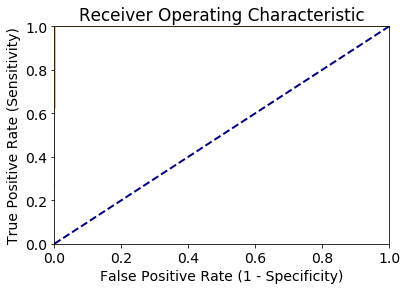

In [107]:
roc(probas=probabilities,
   true=y_test,
   step=.001)

In [90]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1602
         1.0       0.83      0.94      0.88        16

   micro avg       1.00      1.00      1.00      1618
   macro avg       0.92      0.97      0.94      1618
weighted avg       1.00      1.00      1.00      1618



In [91]:
cross_val_score(lr, X_test, y_test, cv=5).mean()

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver 

0.9938175814935362

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
# create a penalty dictionary
penalty = {
    0:100,
    1:1
}

In [94]:
# instantiate random forest model
rf = RandomForestClassifier(random_state=42, n_estimators=12,
                           max_depth=11, min_samples_leaf=1, class_weight=penalty)

In [95]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 100, 1: 1},
            criterion='gini', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=12, n_jobs=None, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [96]:
preds_rf = rf.predict(X_test)

In [97]:
cross_val_score(rf, X_test, y_test, cv=5).mean()

0.9975289413411188

In [98]:
confusion_matrix(y_test, preds_rf)

array([[1601,    1],
       [   3,   13]], dtype=int64)

In [99]:
# print out confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [100]:
print("True Negatives: " + str(tn))
print()
print("False Positives: " + str(fp))
print()
print("False Negatives: " + str(fn))
print()
print("True Positives: " + str(tp))

True Negatives: 1599

False Positives: 3

False Negatives: 1

True Positives: 15
